https://www.geeksforgeeks.org/data-analysis/eda-with-numpy-pandas-matplotlib-seaborn/

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import trim_mean

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Exploratory Data Analysis (EDA)**

It helps answer critical questions about the dataset and guides the necessary preprocessing steps before applying any algorithms. For instance:

    What type of data do we have? Are we working with numbers, text, or dates?
    Are there outliers? These are unusual values that are very different from the rest.
    Is anything missing? Are some parts of the dataset empty or incomplete?

**Pandas for Data Manipulation**

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Files/state.csv")


*Inspecting Dataset*

In [4]:
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,21581788,3.2,AL
1,Alaska,13815092,4.6,AK
2,Arizona,36288921,4.8,AZ
3,Arkansas,27235830,2.3,AR
4,California,26801898,7.8,CA


In [5]:
data.tail()

,State,Population,Murder.Rate,Abbreviation
45,Virginia,13687277,6.0,VA
46,Washington,2370928,6.3,WA
47,West Virginia,38209731,4.9,WV
48,Wisconsin,27439239,6.4,WI
49,Wyoming,23527075,4.5,WY


In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
#data.columns.dtypes

In [8]:
data.index

RangeIndex(start=0, stop=50, step=1)

In [9]:
data.shape

(50, 4)

In [10]:
#extracting rows by position
data.iloc[0]

,0
State,Alabama
Population,21581788
Murder.Rate,3.2
Abbreviation,AL


In [11]:
#extracting rows by name
data.loc[0, "State"]

'Alabama'

In [12]:
data.loc[0]

,0
State,Alabama
Population,21581788
Murder.Rate,3.2
Abbreviation,AL


In [13]:
#count the number of NaN values
data.isnull().sum()

,0
State,0
Population,0
Murder.Rate,0
Abbreviation,0


In [14]:
#reset index
#data = data.reset_index()

#set index
#data = data.set_index()

*Modifying Columns*

In [15]:
#converting the population into millions to make it more readable
data['Population'] = data['Population']/1000000
data.head(3)

,State,Population,Murder.Rate,Abbreviation
0,Alabama,21.581788,3.2,AL
1,Alaska,13.815092,4.6,AK
2,Arizona,36.288921,4.8,AZ


In [16]:
#rename column
data.rename(columns={'Murder.Rate':'Murder_Rate'}, inplace = True)
list(data)

['State', 'Population', 'Murder_Rate', 'Abbreviation']

In [17]:
data.Murder_Rate.unique(
)

array([3.2, 4.6, 4.8, 2.3, 7.8, 6.4, 7.6, 7.3, 5.2, 7.5, 1.6, 2.4, 1.3,
       3.3, 3.7, 2.9, 6.8, 3.5, 3. , 2. , 6.6, 1.5, 7.9, 1. , 6.7, 5.9,
       6.1, 1.8, 7. , 5.4, 1.4, 5.5, 7.2, 4.3, 6. , 6.3, 4.9, 4.5])

In [18]:
#create binary target label
#data['Column'] = data['Column'].apply(lambda x: 1 if x=='Yes' else 0)

*Describing the Data*

In [19]:
#a summary of the dataset which includes count, mean, standard deviation and more
data.describe()

,Population,Murder_Rate
count,50.000000,50.000000
mean,21.108814,4.526000
std,11.744583,2.093704
min,1.965689,1.000000
25%,11.567352,2.925000
50%,21.775286,4.700000
75%,31.811753,6.400000
max,39.797498,7.900000


In [20]:
#a summary of the dataset includes number of rows , column names, data types of each column and the memory usage of the entire dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   State         50 non-null     object 
 1   Population    50 non-null     float64
 2   Murder_Rate   50 non-null     float64
 3   Abbreviation  50 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.7+ KB


*Calculating Central Tendencies*

Understanding the central tendencies of our data helps us summarize it effectively /mean, trimmed mean, weighted mean and median for the dataset's numerical columns/.

In [21]:
#The mean is the average value of a dataset. It's calculated by summing all values and dividing by the number of values.
Population_mean = data.Population.mean()
print ("Population Mean : ", Population_mean)

MurderRate_mean = data.Murder_Rate.mean()
print ("\nMurderRate Mean : ", MurderRate_mean)

Population Mean :  21.10881414

MurderRate Mean :  4.526


In [22]:
#The median is the middle value when the data is sorted and it is useful for understanding the central tendency especially when the data has outliers.
Population_median = data.Population.median()
print ("Population median : ", Population_median)

MurderRate_median = data.Murder_Rate.median()
print ("\nMurderRate median : ", MurderRate_median)

Population median :  21.775286

MurderRate median :  4.699999999999999


**SciPy for computation**

In [23]:
#Trimmed mean calculates the average by removing a certain percentage of the highest and lowest values in the dataset.
#This helps reduce the impact of outliers or extreme values that could skew the overall mean.
population_TM = trim_mean(data.Population, 0.1)
print ("Population trimmed mean: ", population_TM)

murder_TM = trim_mean(data.Murder_Rate, 0.1)
print ("\nMurderRate trimmed mean: ", murder_TM)

Population trimmed mean:  21.187874925

MurderRate trimmed mean:  4.5375


**NumPy for Numerical Operations**

In [24]:
import numpy as np

# Dataset: Exam scores
scores = np.array([45, 50, 55, 60, 65, 70, 75, 80, 200])  # Note: One extreme value (200)

# Calculate basic statistics
mean_score = np.mean(scores)
median_score = np.median(scores)
std_dev_score = np.std(scores)

print(f"Mean: {mean_score}, Median: {median_score}, Standard Deviation: {std_dev_score}")

Mean: 77.77777777777777, Median: 65.0, Standard Deviation: 44.541560561838764


In [25]:
#A weighted mean assigns different weights to different data points.
#Calculate the murder rate weighted by the population meaning larger states have more influence on the mean.
murderRate_WM = np.average(data.Murder_Rate, weights = data.Population)
print ("Weighted MurderRate Mean: ", murderRate_WM)

Weighted MurderRate Mean:  4.716864961131351


## **Data Visualization**

**Matplotlib**

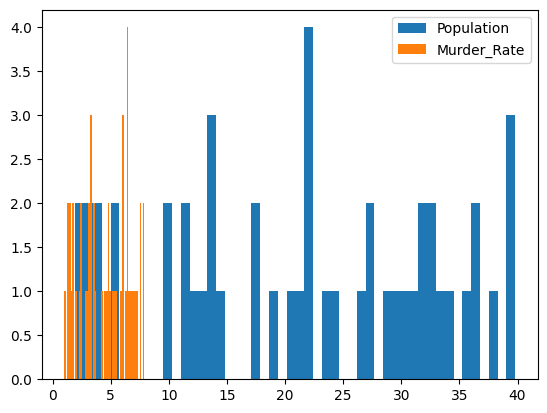

In [26]:
#histogram - shows the distribution of one variable
plt.hist(data.Population, bins = 50, label = "Population")
plt.hist(data.Murder_Rate, bins = 50, label = "Murder_Rate")
plt.legend()
plt.show()

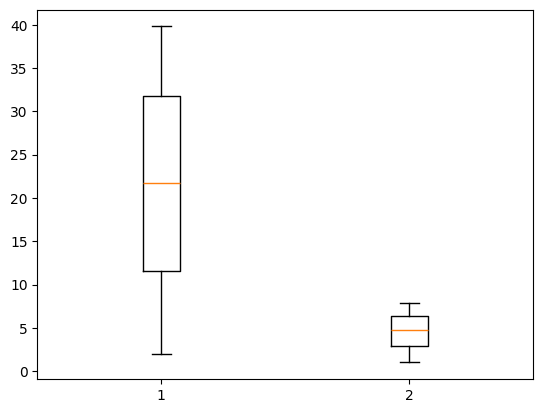

In [27]:
#boxplot - show the distribution of one variable or compare many distributions
#minimum, 25%, median, 75%, maximum
plt.boxplot([data.Population, data.Murder_Rate])
plt.show()

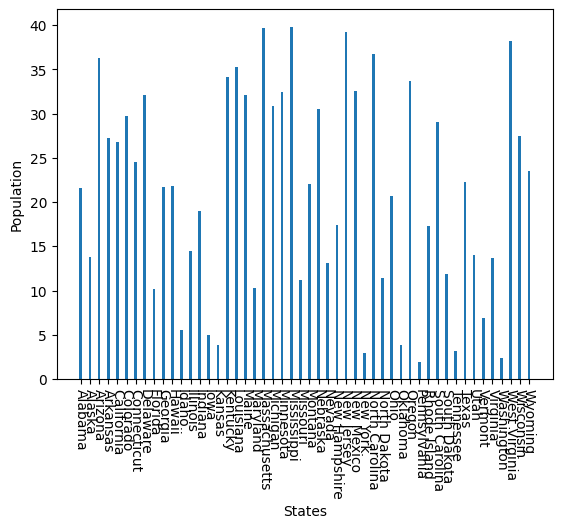

In [28]:
# bar chart - Shows how one numeric value compares among different categories
# Two variables: one categorical, one numerical
plt.bar(data.State, data.Population, width = 0.3)
plt.xticks(rotation = -90)
plt.xlabel('States')
plt.ylabel('Population')
plt.show()

In [29]:
#pie chart - shows the relation of each part to the whole
#plt.pie(data.Population, labels = data.State, autopct = '%1.1f%%', labeldistance = 2)
#plt.show()

**Seaborn for Statistics**

/tmp/ipython-input-2574667893.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 [Text(0, 0, 'Nebraska'),
  Text(1, 0, 'Illinois'),
  Text(2, 0, 'Pennsylvania'),
  Text(3, 0, 'Minnesota'),
  Text(4, 0, 'New York'),
  Text(5, 0, 'Hawaii'),
  Text(6, 0, 'North Dakota'),
  Text(7, 0, 'Vermont'),
  Text(8, 0, 'Massachusetts'),
  Text(9, 0, 'Arkansas'),
  Text(10, 0, 'Montana'),
  Text(11, 0, 'Idaho'),
  Text(12, 0, 'Kansas'),
  Text(13, 0, 'Maine'),
  Text(14, 0, 'Rhode Island'),
  Text(15, 0, 'Alabama'),
  Text(16, 0, 'Indiana'),
  Text(17, 0, 'South Carolina'),
  Text(18, 0, 'Oregon'),
  Text(19, 0, 'North Carolina'),
  Text(20, 0, 'Louisiana'),
  Text(21, 0, 'Iowa'),
  Text(22, 0, 'Utah'),
  Text(23, 0, 'Wyoming'),
  Text(24, 0, 'Alaska'),
  Text(25, 0, 'Arizona'),
  Text(26, 0, 

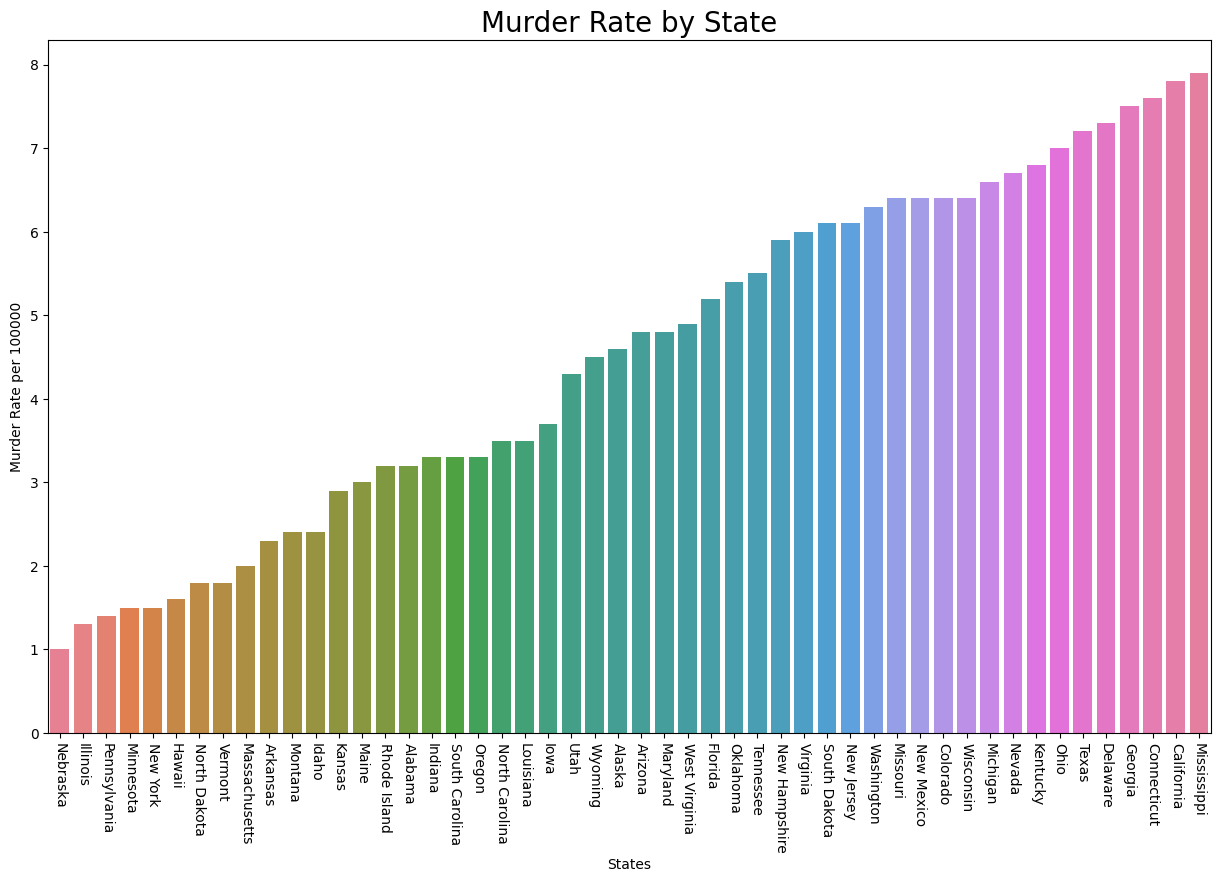

In [30]:
# subplots - a  figure with plot
# Plot population in millions

fig, ax2 = plt.subplots()
fig.set_size_inches(15,  9)

ax2 = sns.barplot(
    x ="State", y ="Murder_Rate",
    data = data.sort_values('Murder_Rate', ascending = 1),
                                         palette ="husl")

ax2.set(xlabel ='States', ylabel ='Murder Rate per 100000')
ax2.set_title('Murder Rate by State', size = 20)

plt.xticks(rotation =-90)